# author - Bhukar Rohan
# CS 4710

## Part1. Construct the contact map (30 points)

### You construct the contact map considering only the C-alpha atom of a residue, denoted by CA in the pdb
### files. The Euclidean distance of two residues is defined as the distance between their C-alpha atoms.
### d = √(x 2 − x 1 ) 2 + (y 2 − y 1 ) 2 + (z 2 − z 1 ) 2 < cutoff
###    Suggested cutoff: 6Å

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def make_contact_map(pdb):
    #read the pdb file from directory
    with open(pdb,'r') as fh:
        file = fh.readlines()
    contact_list = list()
    for line in file:
        if line.startswith('ATOM') and 'CA' in line:
            contact_list.append(line.rstrip())
    pos_dict = dict()
    for line in contact_list:
        key = line.split()[1]+'_'+line.split()[2]
        pos_dict[key] = [float(line.split()[6]),float(line.split()[7]),float(line.split()[8])]
    contact_arr = [ [ 0 for i in range(len(pos_dict.keys())+1) ] for j in range(len(pos_dict.keys())+1) ]
    aa_list = ['D'] + list(pos_dict.keys())
    contact_arr[0] = aa_list
    for i in range(len(contact_arr)):
        contact_arr[i][0] = aa_list[i]
    contact_arr[0][0] = 'D'
    for i in range(1,len(contact_arr)):
        id_x = contact_arr[i][0]
        for j in range(1,len(contact_arr)):
            id_y = contact_arr[0][j]
            d = ((pos_dict[id_x][0]-pos_dict[id_y][0])**2+(pos_dict[id_x][1]-pos_dict[id_y][1])**2+(pos_dict[id_x][2]-pos_dict[id_y][2])**2)**(1/2)
            contact_arr[i][j] = [1 if d < 6 else 0][0]  #if distance is less than cut off = 6 
    # matrx is a NxNx3 matrix
    matrx = np.zeros((len(contact_arr)-1,len(contact_arr)-1,3))
    for i in range(1,len(contact_arr)):
        for j in range(1,len(contact_arr)):
            matrx[i-1][j-1] = [[0,0,0] if contact_arr[i][j] == 1 and i!=j else [1,1,1]][0]
    print("\n\nThe output contact map matrix in Black and White is as follows : ")
    plt.imshow(matrx)
    plt.show()
    grid = [ [ 0 for i in range(len(pos_dict.keys())) ] for j in range(len(pos_dict.keys())) ]
    for i in range(1,len(contact_arr)):
        for j in range(1,len(contact_arr)):
            grid[i-1][j-1] = contact_arr[i][j]
    return grid, contact_arr

Enter the name of the input pdb file : 3nir.pdb


The output contact map matrix in Black and White is as follows : 


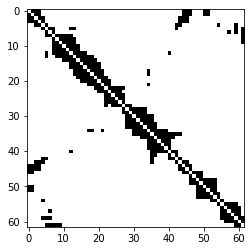

In [41]:
#testing the method for Part 1. | 3nir.pdb
file = input('Enter the name of the input pdb file : ')
grid, pdb_arr = make_contact_map(pdb=file)

Enter the name of the input pdb file : 2igd.pdb


The output contact map matrix in Black and White is as follows : 


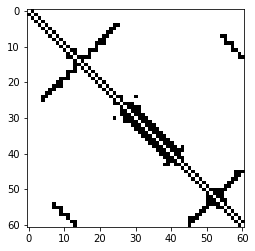

In [21]:
#testing the method for Part 1. | 2igd.pdb
file2 = input('Enter the name of the input pdb file : ')
grid2, pdb_arr2 = make_contact_map(pdb=file2)

## Part 2. Identifying the densest region (30)
### a.  prints the window

In [22]:
def find_max_density_region(pdb, grid: list):
    #read the pdb file from directory
    with open(pdb,'r') as fh:
        file = fh.readlines()
    result = grid.copy()
    dense_records_sum = dict()
    dense_records_coord = dict()
    mat = 1
    for i in range(len(result)-5+1):
        for j in range(len(result[0])-5+1):
            sub_long = result[i:i+5]
            sub_mat = [sub_long[k][j:j+5] for k in range(5)]
            dense_records_sum[mat] = sum(sum(sub_mat,[]))
            dense_records_coord[mat] = [[i,i+5],[j,j+5]]
            mat+=1
    pos = [key for key, value in dense_records_sum.items() if value == max(dense_records_sum.values())][-1]
    coord = dense_records_coord[pos]
    # the maximum density window
    dense_region = [result[int(coord[0][0]):int(coord[0][1])][i][int(coord[0][0]):int(coord[0][1])] for i in range(5)]
    return coord, dense_region

In [23]:
#testing the method for Part 2 - a. | pdb = 3nir.pdb
coords, dense_reg = find_max_density_region(pdb=file, grid=grid)
dense_reg

[[1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1]]

In [24]:
coords

[[56, 61], [56, 61]]

In [25]:
#testing the method for Part 2 - a. | pdb = 2igd.pdb
coords2, dense_reg2 = find_max_density_region(pdb=file2, grid=grid2)
dense_reg2

[[1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1]]

In [26]:
coords2

[[50, 55], [50, 55]]

### b. prints all corresponding amino acids

In [27]:
def print_dense_amino_acids(coords: list, arr: list, pdb):
    #read the pdb file from directory
    pdb_atoms = list()
    with open(pdb,'r') as fh:
        file = fh.readlines()
    for line in file:
        if line.startswith('ATOM'):
            pdb_atoms.append(line.rstrip())
    aa_pos = [x.split('_')[0] for x in arr[0][int(coords[0][0])+1:int(coords[0][1])+1]]
    aa_lines = []
    for line in pdb_atoms:
        if line.split()[1] in aa_pos:
            aa_lines.append(line)
    print('\nThe corresponding amino acids in the densest region are : ')
    [print(x.split()[3]) for x in aa_lines][0]
    return aa_lines

In [28]:
#testing the method for Part 2 - b. | pdb = 3nir.pdb
aa_data = print_dense_amino_acids(coords, pdb_arr, file)


The corresponding amino acids in the densest region are : 
GLY
AASP
BASP
TYR
ALA


In [29]:
aa_data

['ATOM    815  CA  GLY A  42      18.492 -10.771  17.364  1.00  5.48           C',
 'ATOM    823  CA AASP A  43      18.532 -11.457  13.587  0.68  2.94           C',
 'ATOM    824  CA BASP A  43      18.467 -11.728  13.820  0.27  2.86           C',
 'ATOM    848  CA  TYR A  44      14.796 -10.726  13.383  1.00  2.48           C',
 'ATOM    869  CA  ALA A  45      15.022  -7.650  15.547  1.00  2.95           C']

In [30]:
#testing the method for Part 2 - b. | pdb = 2igd.pdb
aa_data2 = print_dense_amino_acids(coords2, pdb_arr2, file2)


The corresponding amino acids in the densest region are : 
ASP
ASP
ALA
THR
LYS


In [31]:
aa_data2

['ATOM    412  CA  ASP A  51      16.716  21.634  20.410  1.00  7.99           C',
 'ATOM    424  CA  ASP A  52      16.413  18.270  18.691  1.00 11.07           C',
 'ATOM    432  CA  ALA A  53      16.219  16.432  22.049  1.00 15.70           C',
 'ATOM    437  CA  THR A  54      12.971  18.177  23.062  1.00 11.05           C',
 'ATOM    444  CA  LYS A  55      11.609  19.022  19.577  1.00  7.82           C']

### c. prints the number of amino acids in the region that belong to alpha-helices

In [32]:
def get_alpha_h_aa(pdb, aa_data: list):
    #read the pdb file from directory
    with open(pdb,'r') as fh:
        file = fh.readlines()
    helix_list = list()
    for line in file:
        if 'HELIX' in line:
            helix_list.append(line)
    # 22 - 25 rule for aa seq number for start, 34 - 37 for end number
    helix_result = list()
    for line in helix_list:
        st,ed = int(''.join(filter(str.isdigit, line[21:25]))),int(''.join(filter(str.isdigit, line[33:37])))
        for aa in aa_data:
            if int(aa[22:26]) >= st and int(aa[22:26]) <= ed:
                helix_result.append(aa.split()[3])
    print("The number of amino acids in the region that belong to alpha-helices are : ",len(helix_result))
    print(helix_result)
    return

In [33]:
#testing the method for Part 2 - c. | 3nir.pdb
get_alpha_h_aa(file, aa_data)

The number of amino acids in the region that belong to alpha-helices are :  0
[]


In [34]:
#testing the method for Part 2 - c. | 2igd.pdb
get_alpha_h_aa(file2, aa_data2)

The number of amino acids in the region that belong to alpha-helices are :  0
[]


### d. prints the number of amino acids in the region that belong to beta-strands

In [42]:
def get_beta_s_aa(pdb, aa_data: list):
    #read the pdb file from directory
    with open(pdb,'r') as fh:
        file = fh.readlines()
    beta_list = list()
    for line in file:
        if 'SHEET' in line:
            beta_list.append(line)
    # 22 - 25 rule for aa seq number for start, 34 - 37 for end number
    beta_result = list()
    for line in beta_list:
        st,ed = int(''.join(filter(str.isdigit, line[22:26]))),int(''.join(filter(str.isdigit, line[33:37])))
        for aa in aa_data:
            if int(aa[22:26]) >= st and int(aa[22:26]) <= ed:
                beta_result.append(aa.split()[3])
    print("The number of amino acids in the region that belong to beta-strands are : ",len(beta_result))
    print(beta_result)
    return

In [43]:
#testing the method for Part 2 - d. | 3nir.pdb
get_beta_s_aa(file, aa_data)

The number of amino acids in the region that belong to beta-strands are :  0
[]


In [44]:
#testing the method for Part 2 - d. | 2igd.pdb
get_beta_s_aa(file2, aa_data2)

The number of amino acids in the region that belong to beta-strands are :  1
['ASP']


## Part 3. Counting dense patterns (20)
### Output: print all dense patterns (with density above the given threshold) and their frequency.

In [47]:
def get_dense_patterns(result: list, limit: int):
    #create a dictionary of dense patterns
    dense_pattern = dict()
    dense_pattern_count = dict()
    threshold = limit
    mat = 1
    for i in range(len(result)-5+1):
        for j in range(len(result[0])-5+1):
            sub_long = result[i:i+5]
            sub_mat = [sub_long[k][j:j+5] for k in range(5)]
            total = sum(sum(sub_mat,[]))
            if total >= threshold:
                if not dense_pattern or sub_mat not in list(dense_pattern.values()):
                    dense_pattern['pattern_'+str(mat)] = sub_mat
                    dense_pattern_count['pattern_'+str(mat)] = 1
                    mat+=1
                else:
                    key = [m for m, v in dense_pattern.items() if v == sub_mat][0]
                    dense_pattern_count[key] = dense_pattern_count[key]+1
    print("Dense patterns \t Frequency\n")
    for k,v in dense_pattern.items():
        print(np.matrix(v),'\t ',dense_pattern_count[k],'\n')
    return

In [48]:
#testing the method for Part 3. | 3nir.pdb
get_dense_patterns(result=grid, limit=10)

Dense patterns 	 Frequency

[[1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 1 1]] 	  5 

[[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [0 1 1 1 1]] 	  2 

[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]] 	  3 

[[0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 1 1 1]
 [0 0 1 1 1]
 [0 1 1 0 0]] 	  1 

[[0 0 1 1 1]
 [0 0 1 1 1]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [1 1 0 0 0]] 	  1 

[[0 1 1 1 0]
 [0 1 1 1 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]] 	  1 

[[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]] 	  1 

[[1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 1 1]
 [0 0 0 0 1]] 	  2 

[[1 1 1 0 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [0 1 1 1 1]
 [0 0 0 1 1]] 	  3 

[[1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]
 [0 0 1 1 1]] 	  2 

[[1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 1]] 	  2 

[[0 0 0 1 1]
 [0 0 1 1 1]
 [0 0 1 1 1]
 [0 1 1 0 0]
 [0 1 0 0 0]] 	  1 

[[0 0 1 1 1]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [1 1 0 0 0]
 [1 0 0 0 0]] 	  1 

[[0 1 1 1 0]
 [1 1 1 0 

In [49]:
#testing the method for Part 3. | 2igd.pdb
get_dense_patterns(result=grid2, limit=10)

Dense patterns 	 Frequency

[[1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 0 1 1]] 	  26 

[[1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]] 	  22 

[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]] 	  22 

[[0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]
 [1 1 1 0 0]] 	  1 

[[0 0 0 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]] 	  1 

[[0 0 0 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]] 	  1 

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 1]] 	  3 

[[0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 1 1 1]
 [0 0 1 0 0]
 [1 1 1 0 0]] 	  1 

[[0 0 0 1 1]
 [0 0 1 1 0]
 [0 1 1 1 0]
 [0 1 0 0 0]
 [1 1 0 0 0]] 	  1 

[[1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 1]
 [0 0 1 1 1]] 	  3 

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 1 1 1 0]] 	  2 

[[0 0 0 1 1]
 [0 0 1 1 1]
 [0 0 1 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]] 	  1 

[[0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 1]] 	  3 

[[1 1 1 0 0]
 [0 1 1

## Part 4 is optional. Bonus. (the lowest score of a past assignment with be increased to the max value).

### Count dense pattern with hashing

In [53]:
def get_hash_dense_patterns(result: list, limit: int):
    #create a dictionary of dense patterns using 2 level hashing as implemented in research paper Jingjing et al.
    dense_pattern = dict()
    threshold = limit
    for i in range(len(result)-5+1):
        for j in range(len(result[0])-5+1):
            sub_long = result[i:i+5]
            sub_mat = [sub_long[k][j:j+5] for k in range(5)]
            total = sum(sum(sub_mat,[]))
            if total >= threshold:
                row_bin = []
                for row in sub_mat:
                    val = int(''.join([str(x) for x in row]),2)
                    row_bin.append(str(val))
                mat_sum = sum([int(x) for x in row_bin]) # sum of binaries
                string_id = '.'.join(row_bin) # string id as hash key
                if not dense_pattern or mat_sum not in list(dense_pattern.keys()):
                    dense_pattern[mat_sum] = dict()
                    dense_pattern[mat_sum][string_id] = [sub_mat,1]
                else:
                    less_data = dense_pattern[mat_sum]
                    if string_id not in list(less_data.keys()):
                        dense_pattern[mat_sum][string_id] = [sub_mat,1]
                    else:
                        dense_pattern[mat_sum][string_id][1] = dense_pattern[mat_sum][string_id][1]+1
    print("Dense patterns \t Frequency\n")
    for k,v in dense_pattern.items():
        for key in v.keys():
            print(np.matrix(v[key][0]),'\t ',v[key][1],'\n')
    return

In [54]:
#testing the method for Part 4. | 3nir.pdb
get_hash_dense_patterns(result=grid, limit=10)

Dense patterns 	 Frequency

[[1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 1 1]] 	  5 

[[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [0 1 1 1 1]] 	  2 

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 1 1]] 	  7 

[[1 1 1 1 1]
 [1 1 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]] 	  1 

[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]] 	  3 

[[0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 1 1 1]
 [0 0 1 1 1]
 [0 1 1 0 0]] 	  1 

[[0 1 1 1 1]
 [0 0 1 1 1]
 [0 0 1 1 1]
 [0 0 0 1 1]
 [0 0 0 0 0]] 	  1 

[[0 0 1 1 1]
 [0 0 1 1 1]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [1 1 0 0 0]] 	  1 

[[0 1 1 1 0]
 [0 1 1 1 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]] 	  1 

[[1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 1 1]
 [0 0 0 0 1]] 	  2 

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 1 1 1 0]] 	  1 

[[1 1 0 0 0]
 [1 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]] 	  3 

[[1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 1 1 1 1]
 [0 1 1 1 1]] 	  1 

[[1 1 1 0 0]
 [1 1 1 0 

In [55]:
#testing the method for Part 4. | 2igd.pdb
get_hash_dense_patterns(result=grid2, limit=10)

Dense patterns 	 Frequency

[[1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 0 1 1]] 	  26 

[[1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]] 	  22 

[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]] 	  22 

[[0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]
 [1 1 1 0 0]] 	  1 

[[0 0 0 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]] 	  1 

[[1 1 1 0 0]
 [1 1 1 1 0]
 [0 0 1 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]] 	  2 

[[0 0 0 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]] 	  1 

[[1 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]] 	  2 

[[0 1 1 1 0]
 [0 1 1 1 1]
 [0 1 0 1 1]
 [1 1 0 0 1]
 [0 0 0 0 0]] 	  1 

[[1 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]] 	  1 

[[0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]
 [1 1 0 0 0]
 [1 0 0 0 0]] 	  1 

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 1]] 	  3 

[[1 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 0 1 1 1]] 	  1 

[[0 0 0 0 1]
 [0 0 0